In [26]:
import pandas as pd
import numpy as np

In [27]:
from dotenv import load_dotenv
import os
from openai import OpenAI
api_key = os.getenv("OPENAI_API_KEY")
client = OpenAI()

## Initial books data preprocessing

In [28]:
books = pd.read_csv('C:/Users/mnasc/Desktop/LCD/3rd Year/Capstone Project/Project/data/books_data.csv')
books.drop(['image','previewLink','publisher','infoLink','ratingsCount'], axis=1, inplace=True)
books.dropna(inplace=True)

In [29]:
books['authors'] = books['authors'].apply(lambda x: eval(x))
books['categories'] = books['categories'].apply(lambda x: eval(x))

## Segmenting books to be used

In [30]:
authors = books['authors'].explode().value_counts()
authors[authors>5]

authors
William Shakespeare      127
Agatha Christie          117
Louis L'Amour            112
Francine Pascal           75
Various                   70
                        ... 
Juliet Marillier           6
Barbara W. Tuchman         6
R. Buckminster Fuller      6
John Ayto                  6
Dick Bruna                 6
Name: count, Length: 2296, dtype: int64

In [31]:
genres = books['categories'].explode().value_counts()
genres[genres>500]

categories
Fiction                        22318
History                         8791
Religion                        8617
Juvenile Fiction                6399
Biography & Autobiography       6021
Business & Economics            5257
Computers                       4109
Social Science                  3578
Juvenile Nonfiction             3206
Science                         2395
Education                       2255
Cooking                         2195
Sports & Recreation             2106
Family & Relationships          2056
Literary Criticism              2004
Medical                         1909
Health & Fitness                1905
Body, Mind & Spirit             1899
Language Arts & Disciplines     1880
Music                           1851
Political Science               1844
Art                             1827
Psychology                      1792
Philosophy                      1733
Travel                          1601
Technology & Engineering        1493
Self-Help                  

In [32]:
books_expl = books.explode('authors')
books_expl_filtered = books_expl[books_expl['authors'].isin(authors[authors>5].index)]

In [33]:
genres_expl = books.explode('categories')
genres_expl_filtered = genres_expl[genres_expl['categories'].isin(genres[genres>500].index)]

In [34]:
final_titles = genres_expl_filtered['Title'][genres_expl_filtered['Title'].isin(books_expl_filtered['Title'])]

In [35]:
final_books = books[books['Title'].isin(final_titles)]

In [36]:
dates = pd.to_datetime(final_books['publishedDate'], format='mixed', errors='coerce')
years = [d.year for d in dates]
final_books['publishedDate'] = years

C:\Users\mnasc\AppData\Local\Temp\ipykernel_36520\698108835.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  dates = pd.to_datetime(final_books['publishedDate'], format='mixed', errors='coerce')
C:\Users\mnasc\AppData\Local\Temp\ipykernel_36520\698108835.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_books['publishedDate'] = years


In [37]:
final_books.head()

,Title,description,authors,publishedDate,categories
23,History of Magic and the Occult,"See the history of witchcraft, magic and super...",[DK],2020,"[Body, Mind & Spirit]"
37,By Honor Bound (The Lassiter Law) (Silhouette ...,A comprehensive guide that defines the literat...,[Kristin Ramsdell],2012,[Language Arts & Disciplines]
38,Usa Laminated Map,"The United States ""Explorer"" map is a classic ...",[National Geographic Maps],2015,[Reference]
75,America at 1750: A Social Portrait,Demonstrates how the colonies developed into t...,[Richard Hofstadter],1973,[History]
86,How to Discipline Kids without Losing Their Lo...,Imagine... No More Arguing. Imagine... No More...,[Jim Fay],2004,[Family & Relationships]


## Generating number of pages for each book

In [38]:
# Splitting into chunks to allow the titles to be inputed to the model
chunks = np.array_split(final_books, 40)

c:\Users\mnasc\anaconda3\envs\capstone-project\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [39]:
def get_answer(prompt, model='gpt-3.5-turbo', **kwargs):
    messages = [{"role": "user", "content": prompt}]
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        **kwargs)
    return response.choices[0].message.content

In [153]:
pages = []
c = 1
for chunk in chunks:
    print(f'Generating for chunk {c}')
    pages.append(get_answer(
                prompt = f"Generate a list (python format) with just the number of pages for the books: {chunk['Title']}",
                top_p=0.1))
    c+=1

Generating for chunk 1
Generating for chunk 2
Generating for chunk 3
Generating for chunk 4
Generating for chunk 5
Generating for chunk 6
Generating for chunk 7
Generating for chunk 8
Generating for chunk 9
Generating for chunk 10
Generating for chunk 11
Generating for chunk 12
Generating for chunk 13
Generating for chunk 14
Generating for chunk 15
Generating for chunk 16
Generating for chunk 17
Generating for chunk 18
Generating for chunk 19
Generating for chunk 20
Generating for chunk 21
Generating for chunk 22
Generating for chunk 23
Generating for chunk 24
Generating for chunk 25
Generating for chunk 26
Generating for chunk 27
Generating for chunk 28
Generating for chunk 29
Generating for chunk 30
Generating for chunk 31
Generating for chunk 32
Generating for chunk 33
Generating for chunk 34
Generating for chunk 35
Generating for chunk 36
Generating for chunk 37
Generating for chunk 38
Generating for chunk 39
Generating for chunk 40


In [166]:
pages

['[23, 37, 38, 75, 86, 4827, 4832, 4835, 4844, 4848]',
 '[4852, 4866, 4884, 4902, 4928, 9607, 9608, 9617, 9628, 9630]',
 '[9639, 9646, 9648, 9651, 9663, 14544, 14566, 14568, 14571, 14607]',
 '[14621, 14622, 14625, 14644, 14655, 19623, 19638, 19643, 19644, 19681]',
 '[19694, 19696, 19706, 19710, 19740, 24245, 24256, 24257, 24262, 24269]',
 '[368, 48, 96, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320,',
 '[28772, 28788, 28792, 28794, 28824, 33211, 33222, 33236, 33252, 33263]',
 '[33264, 33279, 33284, 33293, 33297, 38348, 38359, 38366, 38372, 3

In [ ]:
# Dificulties with inputing the titles to openai. Uneven output. gpt-4o-mini also tested but didnt work either.
# Number of pages will be generated using a normal distribution

In [16]:
final_books['number_pages'] = np.random.normal(300, 60, 19736).astype(int)

C:\Users\mnasc\AppData\Local\Temp\ipykernel_13876\487567453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_books['number_pages'] = np.random.normal(300, 60, 19736).astype(int)


<Axes: >

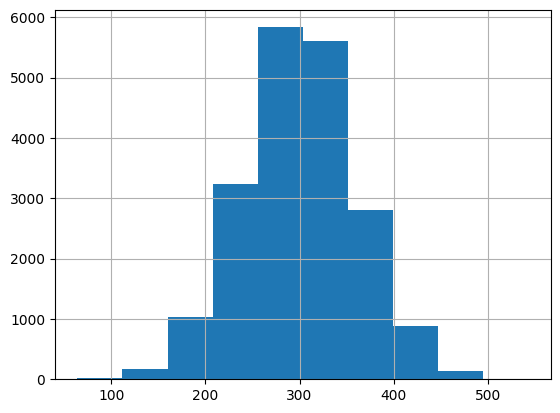

In [17]:
final_books['number_pages'].hist()

In [19]:
# creating new ids
final_books['book_id'] = np.arange(1, len(final_books)+1)

C:\Users\mnasc\AppData\Local\Temp\ipykernel_13876\561031756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_books['book_id'] = np.arange(1, len(final_books)+1)


In [54]:
books_lower = final_books.copy()
books_lower['Title'] = books_lower['Title'].str.lower()
books_lower.drop_duplicates(subset=['Title','description'], inplace=True)
final_books = final_books[final_books['book_id'].isin(books_lower['book_id'])]

In [41]:
final_books = pd.read_csv('C:/Users/mnasc/Desktop/LCD/3rd Year/Capstone Project/Project/data/final_data/books.csv')

In [42]:
ratings = pd.read_csv('C:/Users/mnasc/Desktop/LCD/3rd Year/Capstone Project/Project/data/books_rating.csv')[['Title','review/score']]
ratings = ratings.groupby('Title')['review/score'].mean().reset_index()
final_books = pd.merge(final_books, ratings, left_on='Title', right_on='Title', how='left')

In [43]:
final_books.head()

,Title,description,authors,publishedDate,categories,number_pages,book_id,review/score
0,History of Magic and the Occult,"See the history of witchcraft, magic and super...",['DK'],2020,"['Body, Mind & Spirit']",293,1,4.000000
1,By Honor Bound (The Lassiter Law) (Silhouette ...,A comprehensive guide that defines the literat...,['Kristin Ramsdell'],2012,['Language Arts & Disciplines'],272,2,4.000000
2,Usa Laminated Map,"The United States ""Explorer"" map is a classic ...",['National Geographic Maps'],2015,['Reference'],237,3,5.000000
3,America at 1750: A Social Portrait,Demonstrates how the colonies developed into t...,['Richard Hofstadter'],1973,['History'],320,4,3.777778
4,How to Discipline Kids without Losing Their Lo...,Imagine... No More Arguing. Imagine... No More...,['Jim Fay'],2004,['Family & Relationships'],180,5,4.882353


## Extracting genres and authors tables from the books df

In [55]:
genres = final_books['categories'].explode().to_frame().drop_duplicates().reset_index()
genres['index'] = np.arange(1, len(genres)+1)
genres.columns = ['genre_id', 'genre']

In [56]:
genres.head()

,genre_id,genre
0,1,"Body, Mind & Spirit"
1,2,Language Arts & Disciplines
2,3,Reference
3,4,History
4,5,Family & Relationships


In [57]:
authors = final_books['authors'].explode().to_frame().drop_duplicates().reset_index()
authors['index'] = np.arange(1, len(authors)+1)
authors.columns = ['author_id', 'author']

In [60]:
# Extracting most common book genre for each author
top_genre = books.explode('authors').groupby('authors')['categories'].agg(lambda x: x.value_counts().idxmax()).to_frame().reset_index()

In [61]:
# Merging authors df to get the top genre (in genre_id format)
authors = pd.merge(authors, top_genre, left_on='author', right_on='authors', how='inner').loc[:,['author_id','author','categories']].rename({'categories':'top_genre'}, axis=1)
authors = authors.explode('top_genre')
authors = pd.merge(authors, genres, left_on='top_genre', right_on='genre', how='inner').drop(['top_genre','genre'], axis=1)

In [63]:
authors.head()

,author_id,author,genre_id
0,1,DK,7
1,2,Kristin Ramsdell,2
2,3,National Geographic Maps,3
3,4,Richard Hofstadter,4
4,5,Jim Fay,5


## Extracting authors_books and books_genres tables

In [64]:
# Get author_id
authors_books = pd.merge(final_books.explode('authors'), authors, left_on='authors', right_on='author', how='inner').loc[:,['book_id','author_id']]

In [65]:
authors_books.head()

,book_id,author_id
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5


In [66]:
books_genres = pd.merge(final_books.explode('categories'), genres, left_on='categories', right_on='genre', how='inner').loc[:,['book_id','genre_id']]

In [67]:
books_genres.head()

,book_id,genre_id
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5


## Generating users table

In [ ]:
users = get_answer(prompt=f"""
Generate a list of twenty made-up users of a online platform along \
with their names, email, password, gender, and the district they live in Portugal.
Provide them in JSON format with the following keys:
username, name, email, password, gender, district.
""", temperature=0.6)

In [ ]:
users = pd.read_json(users)
final_users = pd.json_normalize(users['users'])

In [264]:
final_users.head()

,username,name,email,password,gender,district
0,sunny22,Sandra Silva,sandra.silva@example.com,Sunshine123,female,Lisbon
1,techwizard,Tomás Teixeira,tomas.teixeira@example.com,Techie456,male,Porto
2,flowerpower,Fátima Fernandes,fatima.fernandes@example.com,Floral789,female,Faro
3,gamer123,Gonçalo Gomes,goncalo.gomes@example.com,GameOn321,male,Braga
4,bookworm,Beatriz Barbosa,beatriz.barbosa@example.com,ReadMore987,female,Aveiro


## Generating favorite authors for each user

In [68]:
fav_authors = get_answer(prompt=f"""
Generate a list with 1, 2 or 3 numbers each one in the range (1 to 5917), for each username I provide. \
List of usernames: {final_users['username']}. \
Provide them in JSON format with the following keys:
username, author_id.
""", temperature=0.7)

In [69]:
fav_authors = pd.read_json(fav_authors).explode('author_id')

C:\Users\mnasc\AppData\Local\Temp\ipykernel_13876\2567238617.py:1: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  fav_authors = pd.read_json(fav_authors).explode('author_id')


## Generating favorite genres for each user

In [288]:
fav_genres = get_answer(prompt=f"""
Generate a list with 1, 2 or 3 numbers in the range (1 to 45) inclusive, for each username I provide. \
List of usernames: {final_users['username']}. \
Provide them in JSON format with the following keys:
username, genre_id.
""", temperature=0.7)

In [291]:
fav_genres = pd.read_json(fav_genres).explode('genre_id')

C:\Users\mnasc\AppData\Local\Temp\ipykernel_3524\597241072.py:1: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  fav_genres = pd.read_json(fav_genres).explode('genre_id')


In [292]:
fav_genres.head()

,username,genre_id
0,sunny22,7
0,sunny22,15
1,techwizard,3
1,techwizard,18
1,techwizard,22


## Generating the read list for each user

In [354]:
read_list = get_answer(prompt=f"""
Generate for each username a random number between (5 to 15) inclusive.
Generate a list with the size of the random number with random elements ranging from (1 to 19736), 
a list with the same size with elements ranging from (1 to 5) that can contain few null value,
and a list with the same size with binary values, noting that 0 must be predominant. 
List of usernames: {final_users['username'].tolist()}. 
Provide them in JSON format with the following keys:
username, book_id, rating, did_not_finish_flag.
""", temperature=0.7)

In [356]:
read_list = pd.read_json(read_list)
read_list = pd.json_normalize(read_list['users'])

C:\Users\mnasc\AppData\Local\Temp\ipykernel_3524\617701456.py:1: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  read_list = pd.read_json(read_list)


In [358]:
read_list = read_list.explode(['book_id','rating','did_not_finish_flag'])

In [360]:
read_list.head()

,username,book_id,rating,did_not_finish_flag
0,sunny22,13456,5,0
0,sunny22,289,3,0
0,sunny22,7567,None,1
0,sunny22,16789,2,0
0,sunny22,9087,4,0


## Checkpoint

In [ ]:
# Saving data to csv
final_books.to_csv('C:/Users/mnasc/Desktop/LCD/3rd Year/Capstone Project/Project/data/final_data/books.csv', index=False)
authors.to_csv('C:/Users/mnasc/Desktop/LCD/3rd Year/Capstone Project/Project/data/final_data/authors.csv', index=False)
authors_books.to_csv('C:/Users/mnasc/Desktop/LCD/3rd Year/Capstone Project/Project/data/final_data/authors_books.csv', index=False)
genres.to_csv('C:/Users/mnasc/Desktop/LCD/3rd Year/Capstone Project/Project/data/final_data/genres.csv', index=False)
books_genres.to_csv('C:/Users/mnasc/Desktop/LCD/3rd Year/Capstone Project/Project/data/final_data/books_genres.csv', index=False)
final_users.to_csv('C:/Users/mnasc/Desktop/LCD/3rd Year/Capstone Project/Project/data/final_data/final_users.csv', index=False)
fav_authors.to_csv('C:/Users/mnasc/Desktop/LCD/3rd Year/Capstone Project/Project/data/final_data/fav_authors.csv', index=False)
fav_genres.to_csv('C:/Users/mnasc/Desktop/LCD/3rd Year/Capstone Project/Project/data/final_data/fav_genres.csv', index=False)
read_list.to_csv('C:/Users/mnasc/Desktop/LCD/3rd Year/Capstone Project/Project/data/final_data/read_list.csv', index=False)

"authors.to_csv('C:/Users/mnasc/Desktop/LCD/3rd Year/Capstone Project/Project/data/final_data/authors.csv', index=False)\nauthors_books.to_csv('C:/Users/mnasc/Desktop/LCD/3rd Year/Capstone Project/Project/data/final_data/authors_books.csv', index=False)\ngenres.to_csv('C:/Users/mnasc/Desktop/LCD/3rd Year/Capstone Project/Project/data/final_data/genres.csv', index=False)\nbooks_genres.to_csv('C:/Users/mnasc/Desktop/LCD/3rd Year/Capstone Project/Project/data/final_data/books_genres.csv', index=False)\nfinal_users.to_csv('C:/Users/mnasc/Desktop/LCD/3rd Year/Capstone Project/Project/data/final_data/final_users.csv', index=False)\nfav_authors.to_csv('C:/Users/mnasc/Desktop/LCD/3rd Year/Capstone Project/Project/data/final_data/fav_authors.csv', index=False)\nfav_genres.to_csv('C:/Users/mnasc/Desktop/LCD/3rd Year/Capstone Project/Project/data/final_data/fav_genres.csv', index=False)\nread_list.to_csv('C:/Users/mnasc/Desktop/LCD/3rd Year/Capstone Project/Project/data/final_data/read_list.csv',